# Overview
This project is focused on detecting fraudulent transactions using machine learning techniques. The dataset consists of various transaction details, which are preprocessed, modeled, and analyzed for fairness and interpretability.

# Part one: Data Exploration

In [8]:
#import datawig
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import keras
#import datawig
import itertools
from collections import Counter
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from fairlearn.metrics import MetricFrame, demographic_parity_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
import shap
from lime.lime_tabular import LimeTabularExplainer

# Read the raw datafile
raw_data=pd.read_csv('sample_transaction_data.csv')
#Initial exploration of the datasets
pd.set_option('display.max_columns', None)
raw_data.head(10)

/tmp/ipykernel_1161842/2694218441.py:32: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data=pd.read_csv('sample_transaction_data.csv')


,transaction_id,targets,transaction_date,account_open_date,transaction_amount,beneficiary,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115
0,TRX00000000,1,2021-10-03,2021-06-28,52092.586207,Manny's Auto Parts,0.0,False,25.0,0,0,False,False,E,0,NaN,11,False,False,0,NaN,BL1,0,NaN,True,0,1.0,0,0.0,NaN,0,0,0,0,0,0,US,False,0,False,False,0,0,1,0,0.0,Product_6,75,False,0,NaN,0,0,False,False,False,0.0,0,0,True,False,0,0,False,False,1,False,True,0.0,0,0.0,0,False,0,NaN,0,False,False,NaN,NaN,0,False,0,1,0,1,NaN,NaN,False,False,False,5,True,0.0,False,0.538550,0.000000,0,0,0,0,False,False,0,False,0,0,0,0,NaN,0.0,0,0,1,False,0,0,True,0.0,0.0,0,0.0
1,TRX00000001,0,2021-10-03,2021-05-16,50042.970326,Zach's Agriculture,0.0,False,25.0,0,0,False,True,B,0,0.0,23,False,False,0,0.0,BL0,0,0.0,False,0,0.0,0,0.0,0.0,0,0,0,0,0,0,US,False,0,False,False,0,0,2,0,NaN,Product_1,0,False,0,NaN,0,0,False,False,False,NaN,0,0,False,False,0,3,False,False,0,False,False,NaN,0,NaN,0,False,0,NaN,0,False,False,NaN,0.0,0,False,0,0,0,1,NaN,0.0,False,False,False,0,False,0.0,False,0.381115,0.000000,0,0,0,0,False,False,0,False,0,0,0,0,0.0,NaN,0,0,1,False,0,0,False,NaN,0.0,0,0.0
2,TRX00000002,0,2021-10-03,2021-04-19,54255.114574,Fiona's Technical Services,0.0,False,25.0,0,0,False,False,A,0,0.0,58,False,False,0,0.0,BL0,0,0.0,True,0,0.0,0,NaN,0.0,0,0,0,0,0,0,US,False,0,False,False,0,0,2,0,0.0,Product_0,0,False,0,NaN,0,0,False,False,False,NaN,0,0,False,False,0,3,False,False,0,False,False,NaN,0,0.0,0,False,0,NaN,0,False,False,0.0,NaN,0,False,0,0,0,3,NaN,0.0,False,False,False,0,False,0.0,False,NaN,0.000000,0,0,0,0,False,False,0,False,0,0,0,0,NaN,NaN,0,0,1,False,0,0,False,NaN,0.0,0,NaN
3,TRX00000003,0,2021-10-03,2021-04-13,61722.527737,Omar's Exteriors,0.0,True,25.0,0,9,False,False,C,0,1.0,44,False,False,0,0.0,BL0,0,5.0,False,0,0.0,0,NaN,NaN,0,0,0,0,0,0,US,False,12,False,False,0,0,1,29,0.0,Product_9,20,False,0,0.0,0,0,False,False,False,NaN,0,0,False,True,1,1,False,False,1,False,False,NaN,0,0.0,0,True,0,0.0,1,False,False,NaN,NaN,0,False,7,1,0,8,NaN,0.0,False,False,False,3,False,0.0,False,0.178724,225.800000,0,0,0,0,False,False,0,True,0,0,0,0,NaN,NaN,0,0,1,False,0,0,False,1.0,0.0,0,NaN
4,TRX00000004,0,2021-10-03,2021-03-15,54313.312765,Steve's Utilities,0.0,True,25.0,0,0,False,True,C,1,NaN,1608,False,False,0,NaN,BL1,0,NaN,False,0,0.0,0,169.0,0.0,53,0,0,0,605,0,GB,False,2684,False,False,1,0,85,3034,0.0,Product_0,83,False,0,0.0,0,66,False,False,True,NaN,1,0,True,False,1,85,False,True,3,False,False,NaN,133,1.0,19,False,0,85.0,1,False,True,0.0,NaN,146,False,144,0,0,189,NaN,0.0,False,False,False,8,False,0.0,False,0.394032,28343.108225,91,0,0,0,False,False,0,True,1,0,0,0,0.0,NaN,1,98,1,False,14,0,False,NaN,0.0,0,29.0
5,TRX00000005,0,2021-10-03,NaN,94572.246547,Hans's Hunting,0.0,False,25.0,0,0,False,False,A,0,0.0,25,False,False,0,NaN,BL1,0,0.0,True,0,0.0,0,0.0,0.0,0,0,0,0,0,0,US,False,0,False,False,1,0,1,0,NaN,Product_9,7,False,0,NaN,0,0,False,False,False,0.0,0,0,False,False,0,2,False,False,0,False,False,NaN,0,0.0,0,False,0,NaN,0,False,False,0.0,NaN,0,False,0,0,0,1,NaN,0.0,False,False,False,1,False,0.0,False,NaN,0.000000,0,0,0,0,False,False,0,False,0,0,0,0,NaN,0.0,0,0,1,False,0,0,False,NaN,0.0,0,0.0
6,TRX00000006,0,2021-10-03,2021-

In [7]:
raw_data.describe()

,targets,transaction_amount,col_0,col_3,col_4,col_8,col_9,col_10,col_13,col_14,col_16,col_17,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_32,col_35,col_36,col_37,col_38,col_39,col_41,col_43,col_44,col_45,col_46,col_50,col_51,col_52,col_55,col_56,col_59,col_62,col_63,col_64,col_65,col_67,col_68,col_69,col_72,col_73,col_74,col_76,col_77,col_78,col_79,col_80,col_81,col_85,col_87,col_89,col_90,col_91,col_92,col_93,col_94,col_97,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_109,col_110,col_112,col_113,col_114,col_115
count,15781.000000,1.578100e+04,12186.000000,15781.000000,15781.000000,15781.000000,10898.000000,15781.000000,15781.0,9740.000000,15781.000000,4499.000000,15781.000000,12905.000000,15781.0,10713.000000,10568.0,15781.000000,15781.0,15781.0,15781.0,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,3554.000000,15781.000000,15781.0,11862.000000,15781.0,15781.000000,4134.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,1698.000000,15781.000000,15380.000000,15781.000000,15781.000000,8231.000000,15781.000000,12284.000000,11239.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,3365.000000,11450.0,15781.000000,14020.0,11308.000000,1.578100e+04,15781.000000,15781.0,15781.000000,15781.0,15781.000000,15781.000000,15781.000000,15781.0,15781.000000,7020.0,5485.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,2150.000000,10438.0,15781.000000,11437.000000
mean,0.047589,1.101420e+05,0.004185,0.266967,2.487358,0.669413,17.052028,334.344718,0.0,0.027002,0.512832,46.892643,0.042203,0.008059,0.0,6.362550,0.0,3.188264,0.0,0.0,0.0,26.464926,0.006463,198.425512,0.406755,190.349217,3.402953,226.375261,0.079629,35.893860,0.0,0.509526,0.0,5.800963,0.002419,0.320322,0.488119,4.760915,2.803941,1.321969,0.048292,14.228122,0.148765,13.116216,2.815855,1.811202,3.628351,0.012292,16.573450,4.973259,19.951841,0.815474,0.729548,39.202712,3.438336,0.0,2.571827,0.0,0.277038,4.477378e+04,3.103606,0.0,0.264685,0.0,0.001774,0.859261,0.036373,0.0,0.006210,0.0,0.015314,0.377733,9.180153,0.999937,9.205120,1.112287,0.006512,0.0,0.010392,7.206610
std,0.212901,3.396154e+05,0.064560,1.858497,47.191492,20.223097,180.610973,728.378619,0.0,0.162098,8.287731,95.804380,0.712192,0.089412,0.0,42.962597,0.0,15.548223,0.0,0.0,0.0,207.505465,0.811957,656.758693,0.565374,5630.480484,14.314321,730.756553,0.835880,51.819809,0.0,12.242259,0.0,39.327704,0.049129,3.516967,6.421649,18.928330,11.273378,3.078721,0.401852,85.591487,0.355868,88.825883,18.877916,12.794661,13.976785,0.147476,190.742792,35.530198,87.626759,4.680466,4.612759,105.446175,12.038267,0.0,2.477476,0.0,0.144395,4.252416e+05,27.600306,0.0,2.387274,0.0,0.067525,20.917041,0.312511,0.0,0.082496,0.0,0.122812,4.114176,112.744071,0.007960,75.953666,5.382758,0.080450,0.0,0.833864,24.631301
min,0.000000,5.000317e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.003193,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,5.213120e+04,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

0    15030
1      751
Name: targets, dtype: int64


<AxesSubplot:>

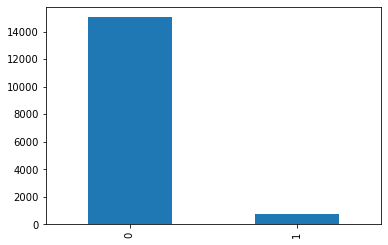

In [6]:
#Visualize our class imbalance
count = raw_data['targets'].value_counts()
print(count)
 
fig, ax = plt.subplots()
raw_data['targets'].value_counts().plot(ax=ax, kind='bar')

In [7]:
pd.set_option('display.max_rows', None)
raw_data.isna().sum()

transaction_id            0
targets                   0
transaction_date          0
account_open_date       106
transaction_amount        0
beneficiary               0
col_0                  3595
col_1                     0
col_2                     0
col_3                     0
col_4                     0
col_5                     0
col_6                     0
col_7                     0
col_8                     0
col_9                  4883
col_10                    0
col_11                    0
col_12                    0
col_13                    0
col_14                 6041
col_15                    0
col_16                    0
col_17                11282
col_18                    0
col_19                    0
col_20                 2876
col_21                    0
col_22                 5068
col_23                 5213
col_24                    0
col_25                    0
col_26                    0
col_27                    0
col_28                    0
col_29              

<AxesSubplot:>

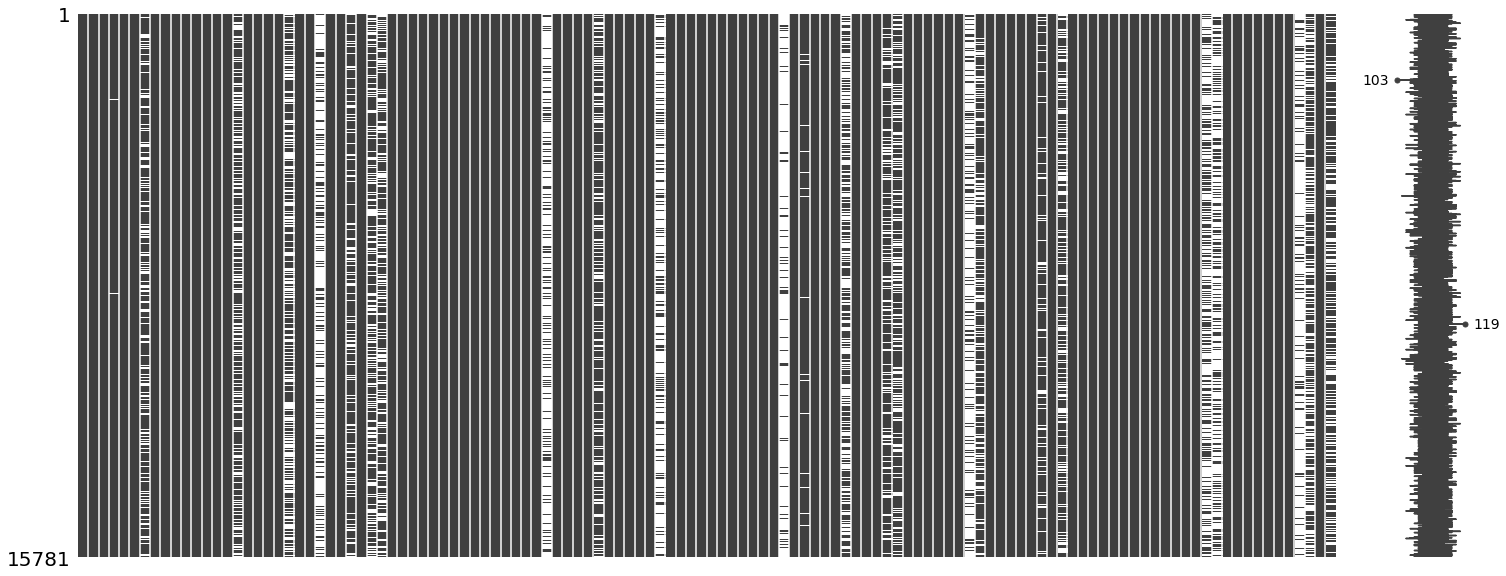

In [8]:
#Visualize the missing data

msno.matrix(raw_data)

<AxesSubplot:>

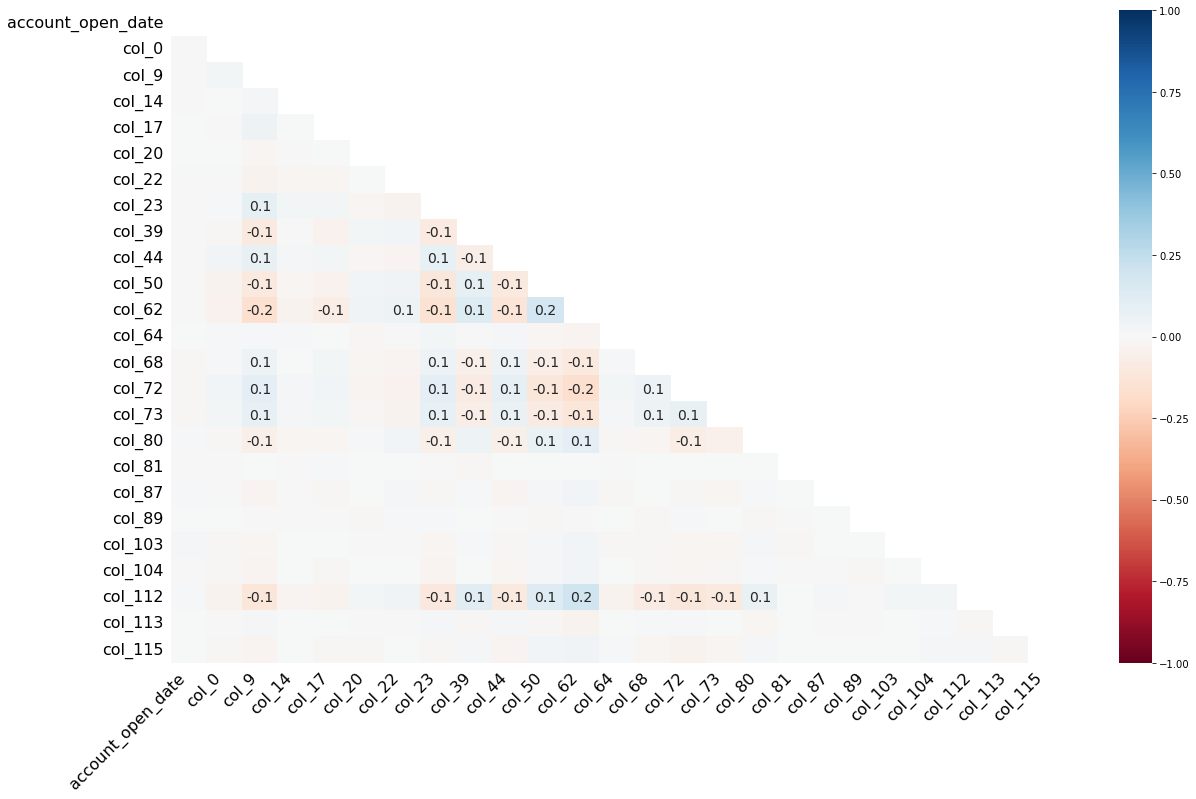

In [9]:
#Identify if there is a relationship in the presence of null values between each of the columns.
msno.heatmap(raw_data)

<AxesSubplot:>

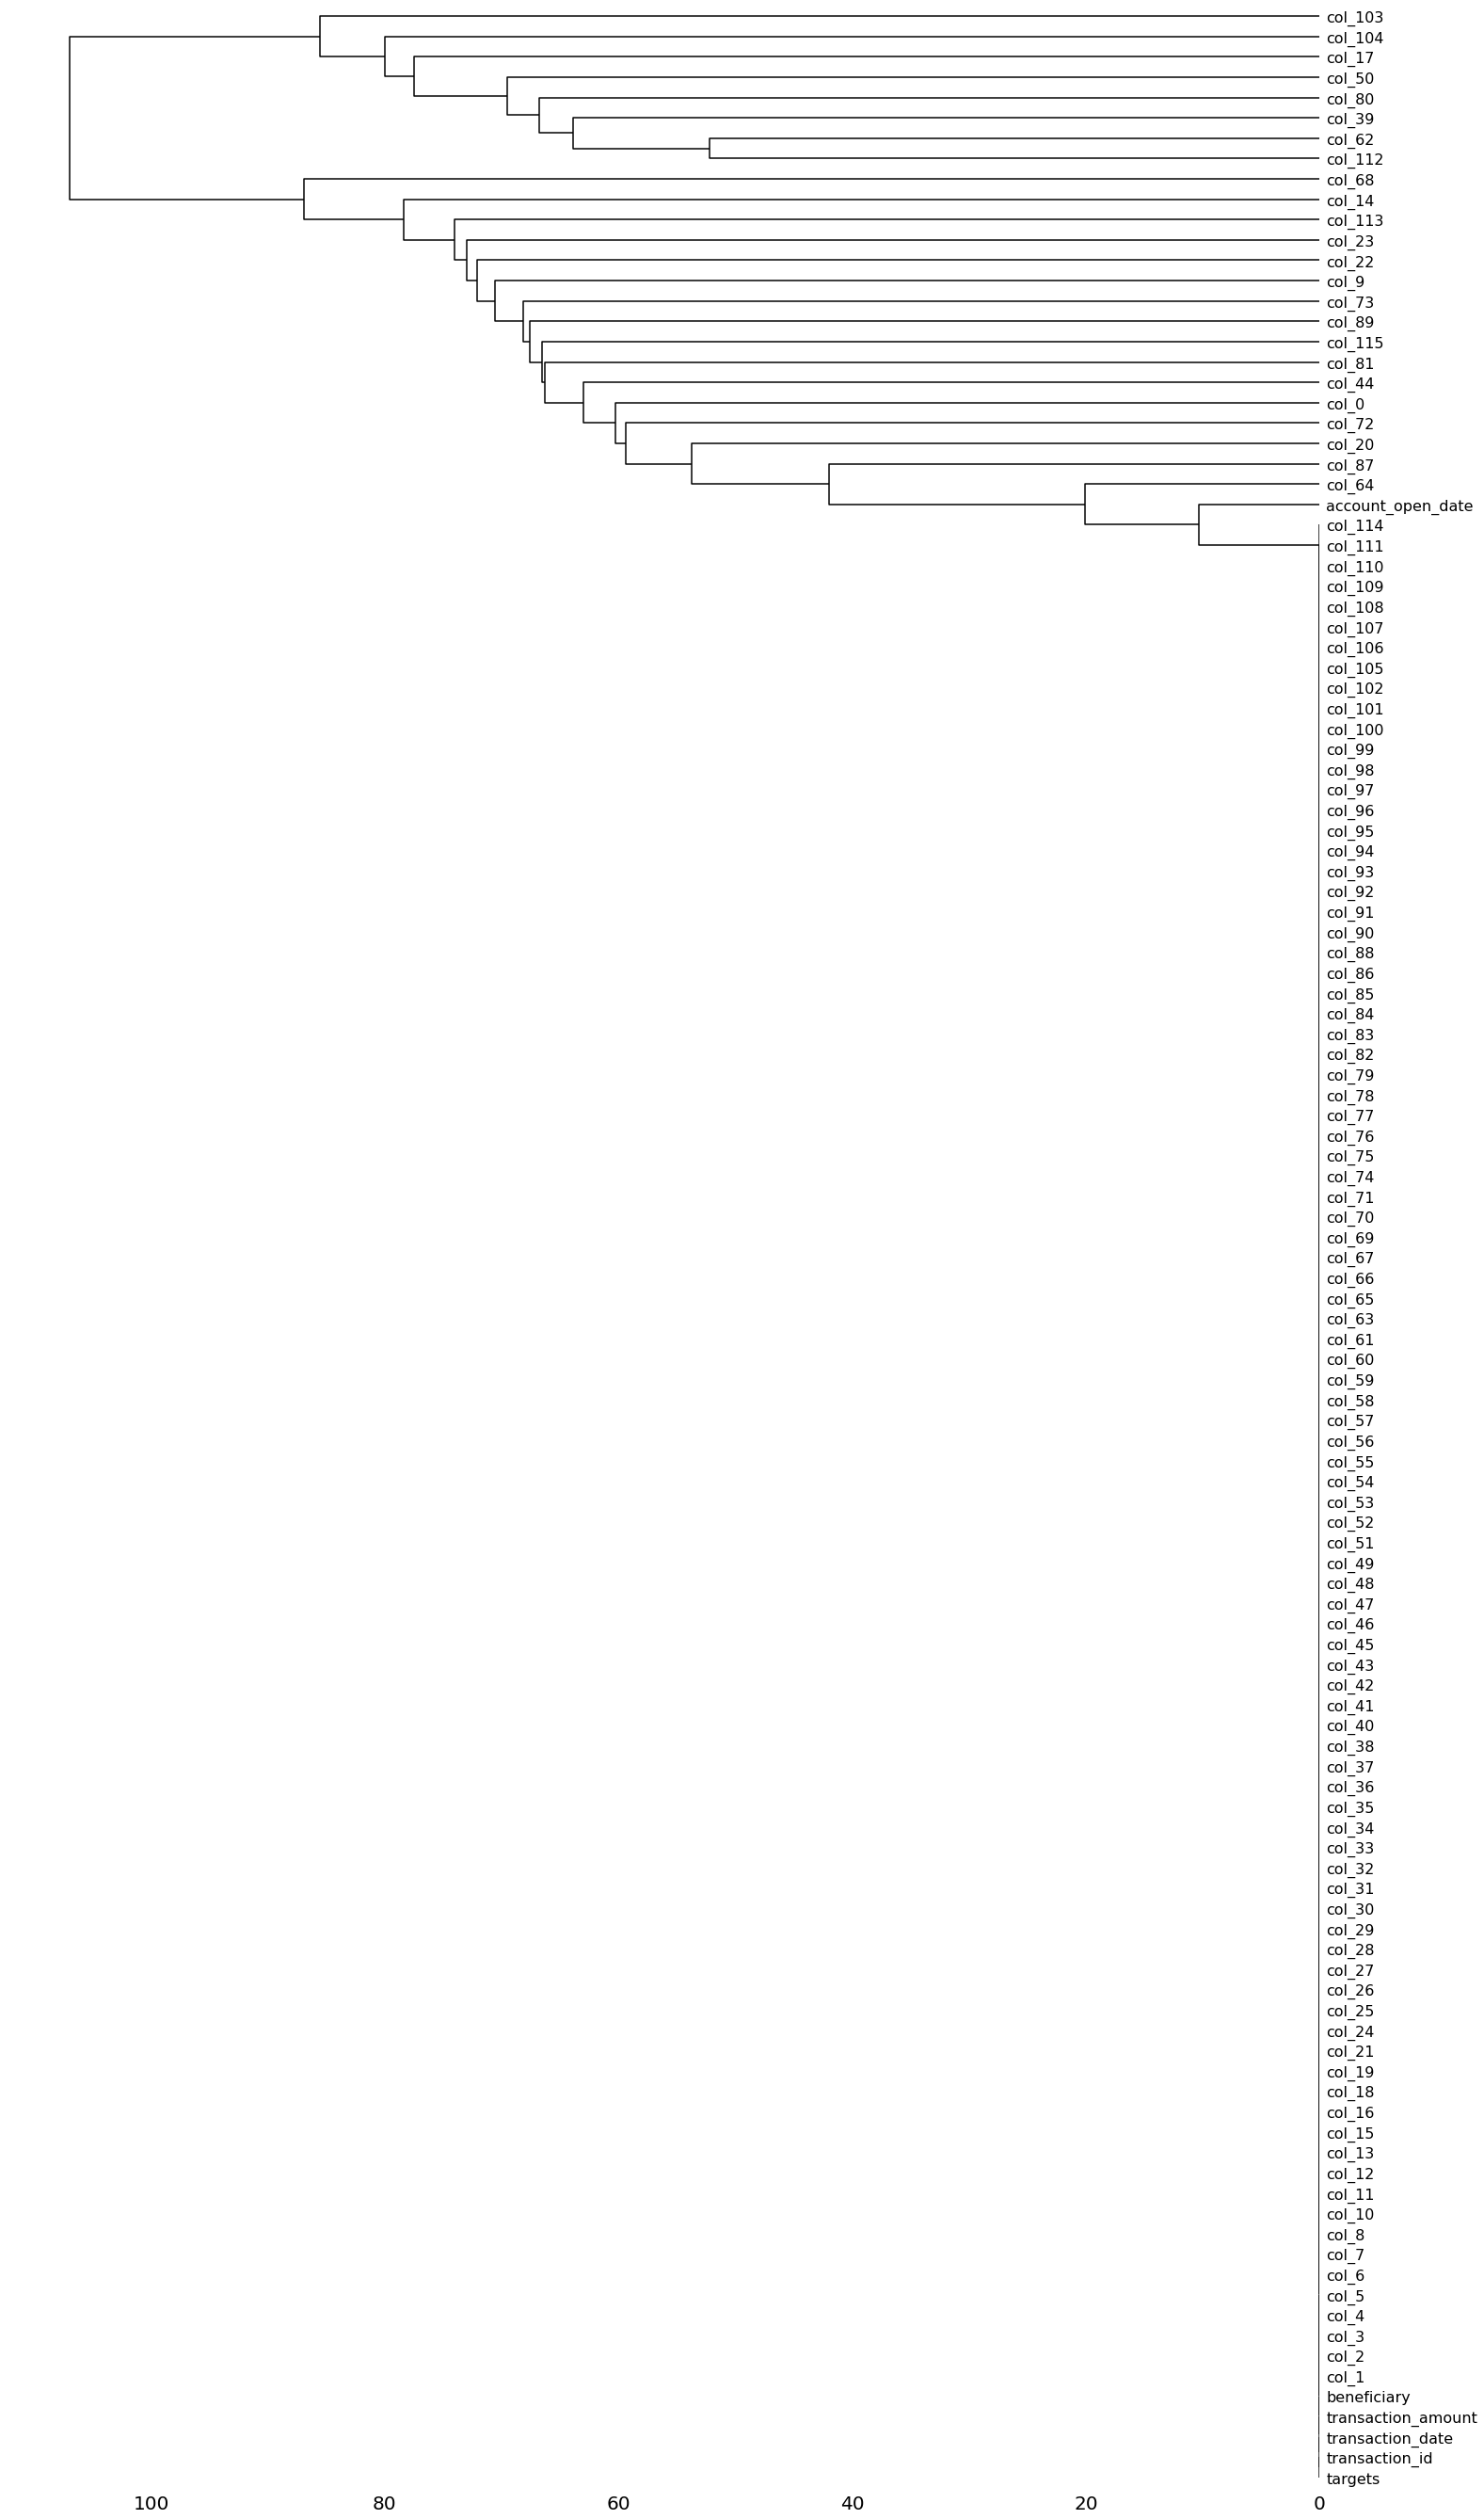

In [10]:
# Show hierarchical clustering and group together columns that have strong correlations in nullity.

msno.dendrogram(raw_data)

In [70]:
raw_data.dtypes

transaction_id         object
targets                 int64
transaction_date       object
account_open_date      object
transaction_amount    float64
beneficiary            object
col_0                 float64
col_1                    bool
col_2                  object
col_3                   int64
col_4                   int64
col_5                    bool
col_6                    bool
col_7                  object
col_8                   int64
col_9                 float64
col_10                  int64
col_11                   bool
col_12                   bool
col_13                  int64
col_14                float64
col_15                 object
col_16                  int64
col_17                float64
col_18                   bool
col_19                  int64
col_20                float64
col_21                  int64
col_22                float64
col_23                float64
col_24                  int64
col_25                  int64
col_26                  int64
col_27    

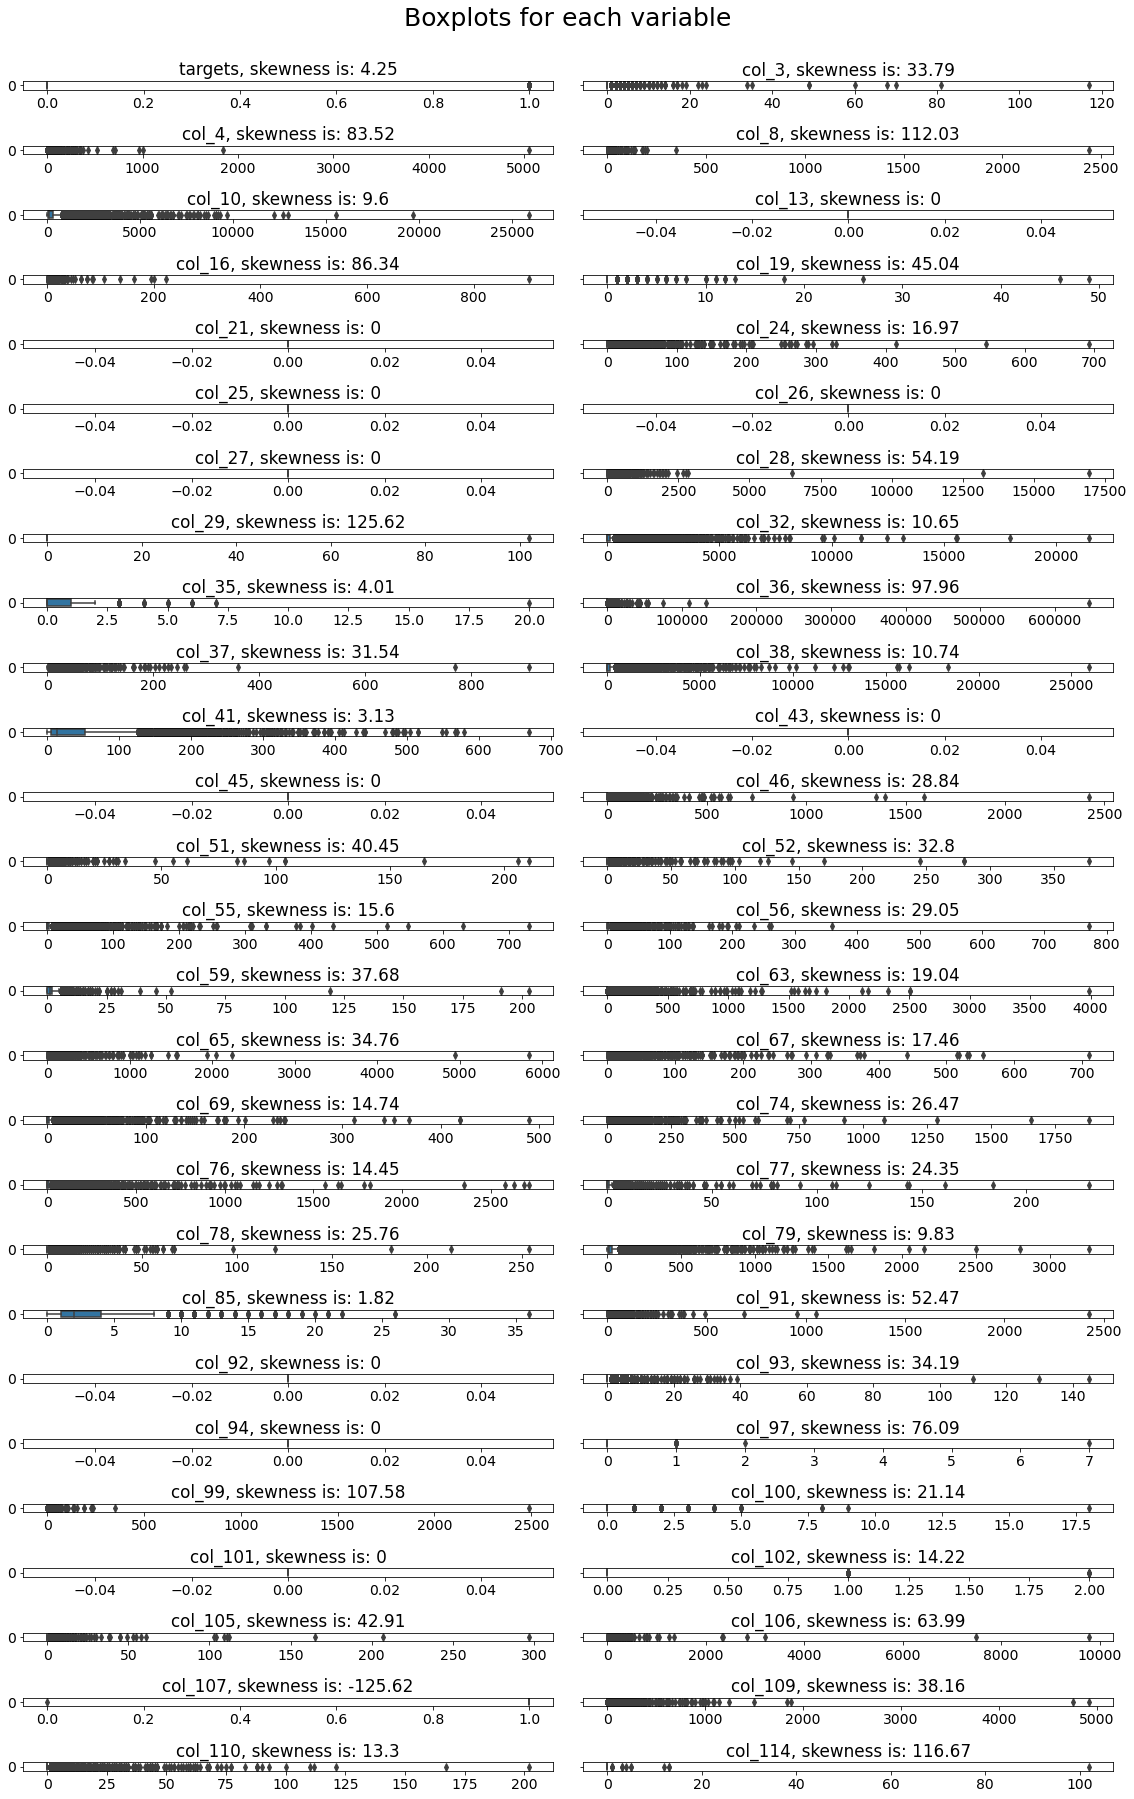

In [87]:
# checking Skewness and outliers
import seaborn as sns
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

numeric_columns=[] 
for c in raw_data.columns:
    if raw_data[c].map(type).eq(int).any(): #check if there are any strings in column
        numeric_columns.append(c)
      
boxplots_custom(dataset=raw_data, columns_list=numeric_columns, rows=27, cols=2, suptitle='Boxplots for each variable')
plt.tight_layout()

# Part two: Data Preparation


In [111]:
#Drop cols with more than 30% of missing data
limitPer = len(raw_data) * .70
print(limitPer)

filtered_df = raw_data.dropna( axis='columns',thresh=limitPer)
filtered_df.isna().sum()

11046.699999999999


transaction_id           0
targets                  0
transaction_date         0
account_open_date      106
transaction_amount       0
beneficiary              0
col_0                 3595
col_1                    0
col_2                    0
col_3                    0
col_4                    0
col_5                    0
col_6                    0
col_7                    0
col_8                    0
col_10                   0
col_11                   0
col_12                   0
col_13                   0
col_15                   0
col_16                   0
col_18                   0
col_19                   0
col_20                2876
col_21                   0
col_24                   0
col_25                   0
col_26                   0
col_27                   0
col_28                   0
col_29                   0
col_30                   0
col_31                   0
col_32                   0
col_33                   0
col_34                   0
col_35                   0
c

In [112]:
#Not requiered

def IQR_method (df,n,features):
    # Perform outlier identification, credit https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers
numeric_columns=[] 
for c in filtered_df.columns:
    if filtered_df[c].map(type).eq(int).any(): #check if there are any strings in column
        numeric_columns.append(c)

Outliers_IQR = IQR_method(filtered_df,1,numeric_columns)

# dropping outliers
filtered_df = filtered_df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)


Total number of deleted outliers is: 13


In [113]:
# Impute missing numerical values with Mean/Median
#filtered_df[""]=filtered_df.replace(np.Nan,filtered_df[""].mean())
categorical_columns = []
numeric_columns = []
bool_columns = []
for c in filtered_df.columns:
    if filtered_df[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    elif filtered_df[c].map(type).eq(bool).any(): #check if there are any strings in column
        bool_columns.append(c)
    else:
        numeric_columns.append(c)

#create three DataFrames, one for each data type
data_numeric = filtered_df[numeric_columns]
data_categorical = pd.DataFrame(filtered_df[categorical_columns])
data_boolian = pd.DataFrame(filtered_df[bool_columns])
#Move the class (targets to the catecorigal pd)
extracted_class = data_numeric["targets"] 
data_numeric=data_numeric.drop(columns=['targets'])
data_categorical = data_categorical.join(extracted_class)


imp = SimpleImputer(missing_values=np.nan, strategy='mean') 
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns, index=data_numeric.index) #only apply imputer to numeric columns

data_boolian=data_boolian*1 # convert boolian to 1s and 0s
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
data_boolian = pd.DataFrame(imp.fit_transform(data_boolian), columns = data_boolian.columns) #only apply imputer to boolian columns
#data_categorical["account_open_date"]

#join the dataframes back together
data_joined = pd.concat([data_categorical,data_numeric,data_boolian], axis = 1)
data_joined.isna().sum()

transaction_id         0
transaction_date       0
account_open_date     49
beneficiary            0
col_2                  0
col_7                  0
col_15                 0
col_30                 0
col_40                 0
targets                0
transaction_amount     0
col_0                  0
col_3                  0
col_4                  0
col_8                  0
col_10                 0
col_13                 0
col_16                 0
col_19                 0
col_20                 0
col_21                 0
col_24                 0
col_25                 0
col_26                 0
col_27                 0
col_28                 0
col_29                 0
col_32                 0
col_35                 0
col_36                 0
col_37                 0
col_38                 0
col_41                 0
col_43                 0
col_44                 0
col_45                 0
col_46                 0
col_51                 0
col_52                 0
col_55                 0


In [13]:
# Impute account_open_date data using datawig
'''
df_train, df_test = datawig.utils.random_split(filtered_data)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['transaction_date'], # column(s) containing information about the column we want to impute
    output_column= "account_open_date", # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=20)

#Impute missing values and return original dataframe with predictions
#imputed = imputer.predict(df_test)
'''

'\ndf_train, df_test = datawig.utils.random_split(filtered_data)\n\n#Initialize a SimpleImputer model\nimputer = datawig.SimpleImputer(\n    input_columns=[\'transaction_date\'], # column(s) containing information about the column we want to impute\n    output_column= "account_open_date", # the column we\'d like to impute values for\n    output_path = \'imputer_model\' # stores model data and metrics\n    )\n\n#Fit an imputer model on the train data\nimputer.fit(train_df=df_train, num_epochs=20)\n\n#Impute missing values and return original dataframe with predictions\n#imputed = imputer.predict(df_test)\n'

In [14]:
# Insted of imputing the missing account_open_date, drop the rows. I opted to using this approach instead of 
# imputing it using datawig because all nan values are concentrated in class "0"

filtered_df=data_joined.dropna().reset_index(drop=True)
filtered_df.drop_duplicates(inplace=True)
count = filtered_df['targets'].value_counts()
print(count)
# Create a new feature called account_age to help classify the fradulant transactions
filtered_df['account_open_date']=pd.to_numeric(filtered_df.account_open_date.str.replace('-',''))
filtered_df['transaction_date']=pd.to_numeric(filtered_df.transaction_date.str.replace('-',''))
filtered_df['account_age'] = ( filtered_df['transaction_date']-filtered_df['account_open_date'])
filtered_df.head(5)

0    14924
1      751
Name: targets, dtype: int64


,transaction_id,transaction_date,account_open_date,beneficiary,col_2,col_7,col_15,col_30,col_40,targets,transaction_amount,col_0,col_3,col_4,col_8,col_10,col_13,col_16,col_19,col_20,col_21,col_24,col_25,col_26,col_27,col_28,col_29,col_32,col_35,col_36,col_37,col_38,col_41,col_43,col_44,col_45,col_46,col_51,col_52,col_55,col_56,col_59,col_63,col_64,col_65,col_67,col_69,col_72,col_73,col_74,col_76,col_77,col_78,col_79,col_81,col_85,col_87,col_89,col_90,col_91,col_92,col_93,col_94,col_97,col_99,col_100,col_101,col_102,col_105,col_106,col_107,col_109,col_110,col_114,col_115,col_1,col_5,col_6,col_11,col_12,col_18,col_31,col_33,col_34,col_42,col_47,col_48,col_49,col_53,col_54,col_57,col_58,col_60,col_61,col_66,col_70,col_71,col_75,col_82,col_83,col_84,col_86,col_88,col_95,col_96,col_98,col_108,col_111,account_age
0,TRX00000000,20211003,20210628,Manny's Auto Parts,25.0,E,BL1,US,Product_6,1,52092.586207,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,75.0,0.0,0.509526,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.012292,16.57345,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,0.538550,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,375
1,TRX00000001,20211003,20210516,Zach's Agriculture,25.0,B,BL0,US,Product_1,0,50042.970326,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.509526,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.148765,0.0,0.0,0.0,0.012292,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.381115,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,487
2,TRX00000002,20211003,20210419,Fiona's Technical Services,25.0,A,BL0,US,Product_0,0,54255.114574,0.0,0.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.509526,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,16.57345,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.277038,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.20661,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,584
3,TRX00000003,20211003,20210413,Omar's Exteriors,25.0,C,BL0,US,Product_9,0,61722.527737,0.0,0.0,9.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,29.0,20.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.012292,16.57345,0.0,7.0,1.0,0.0,8.0,0.0,3.0,0.0,0.178724,225.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.20661,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,590
4,TRX00000004,20211003,20210315,Steve's Utilities,25.0,C,BL1,GB,Product_0,0,54313.312765,0.0,0.0,0.0,1.0,1608.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,605.0,0.0,2684.0,1.0,0.0,85.0,3034.0,83.0,0.0,0.000000,0.0,66.0,1.0,0.0,1.0,85.0,3.0,133.0,1.000000,19.0,0.0,1.0,0.000000,16.57345,146.0,144.0,0.0,0.0,189.0,0.0,8.0,0.0,0.394032,28343.108225,91.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0,1.0,14.0,0.0,0.0,29.00000,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,688


In [15]:


# Catecorize and normalize the data
df_normalized = filtered_df.copy()
df_normalized = df_normalized.replace(".", )
#df_normalized['col_2']=df_normalized['col_2'].astype('float')
df_normalized['col_2'] = pd.to_numeric(df_normalized['col_2'])
# apply normalization techniques
column = 'col_2'
df_normalized[column] = MinMaxScaler().fit_transform(np.array(df_normalized[column]).reshape(-1,1))

int_columns=[]
all_columns=[]
for c in df_normalized.columns:
    if df_normalized[c].map(type).eq(int).any(): #check if there are any strings in column
        int_columns.append(c)
    else:
        all_columns.append(c)
        
int_columns = pd.DataFrame(df_normalized[int_columns])
all_columns = pd.DataFrame(df_normalized[all_columns])
int_columns = int_columns.astype(float)
normalized_data_joined = pd.concat([all_columns,int_columns], axis = 1)

 
# apply normalization techniques
float_columns=[]
all_columns=[]
for c in normalized_data_joined .columns:
    if normalized_data_joined[c].map(type).eq(float).any():
        float_columns.append(c)
    else:
        all_columns.append(c)
float_df = pd.DataFrame(normalized_data_joined [float_columns])
all_df = pd.DataFrame(normalized_data_joined [all_columns])
for col in float_df.columns:
    float_df[col] = MinMaxScaler().fit_transform(np.array(float_df[col]).reshape(-1,1))    
normalized_data_joined = pd.concat([all_df,float_df], axis = 1)


# Part 3: Training

In [16]:
# Split datasets
from sklearn.model_selection import train_test_split
normalized_data_joined["targets"] = normalized_data_joined["targets"].astype(int)
data = normalized_data_joined.copy()
data = data.drop(['transaction_id','beneficiary','col_7','col_15','col_30','col_40'], axis = 1)
y = data["targets"]
X = data.drop(["targets"], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



In [17]:
model = Sequential([
Dense(input_dim = 102, units = 30, activation = 'relu'),
Dense(units = 40, activation = 'relu'),
Dropout(0.5),
Dense(units = 28, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dropout(0.5),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),])

2023-01-22 19:57:53.332562: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-01-22 19:57:53.440959: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.635GHz coreCount: 68 deviceMemorySize: 10.73GiB deviceMemoryBandwidth: 573.69GiB/s
2023-01-22 19:57:53.442531: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:17:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2023-01-22 19:57:53.444147: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:18:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50


2023-01-22 19:58:07.037012: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


732/732 [==============================] - 2s 3ms/step - loss: 0.1754 - accuracy: 0.9495
Epoch 2/50
732/732 [==============================] - 2s 3ms/step - loss: 0.1000 - accuracy: 0.9525
Epoch 3/50
732/732 [==============================] - 2s 3ms/step - loss: 0.0882 - accuracy: 0.9686
Epoch 4/50
732/732 [==============================] - 2s 3ms/step - loss: 0.0831 - accuracy: 0.9751
Epoch 5/50
732/732 [==============================] - 2s 3ms/step - loss: 0.0810 - accuracy: 0.9772
Epoch 6/50
732/732 [==============================] - 2s 3ms/step - loss: 0.0779 - accuracy: 0.9782
Epoch 7/50
732/732 [==============================] - 2s 3ms/step - loss: 0.0744 - accuracy: 0.9784
Epoch 8/50
732/732 [==============================] - 2s 3ms/step - loss: 0.0715 - accuracy: 0.9800
Epoch 9/50
732/732 [==============================] - 2s 3ms/step - loss: 0.0672 - accuracy: 0.9807
Epoch 10/50
732/732 [==============================] - 2s 3ms/step - loss: 0.0646 - accuracy: 0.9795
Epoch 11/5

In [19]:
score = model.evaluate(X_test, y_test)
print(score)
#The score uses accuracy as a metric, accuracy is the sum of TN+ TP/total dataset size

147/147 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9464
[0.15950754284858704, 0.9464171528816223]


In [20]:
y_pred = model.predict(X_test)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[4242  231]
 [  21  209]]


Confusion matrix, without normalization


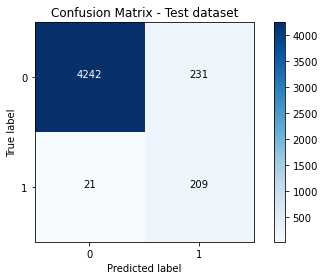

In [22]:
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

In [23]:
print('accuracy_score',accuracy_score(y_test, y_pred.round()))
print('precision_score',precision_score(y_test, y_pred.round()))
print('recall_score',recall_score(y_test, y_pred.round()))
print('f1_score',f1_score(y_test, y_pred.round()))

accuracy_score 0.9464171805230703
precision_score 0.475
recall_score 0.908695652173913
f1_score 0.6238805970149254


In [24]:
#using SMOTE to balance data
X_resample, y_resample = SMOTE().fit_sample(X, y)

1    14924
0    14924
Name: targets, dtype: int64


<AxesSubplot:>

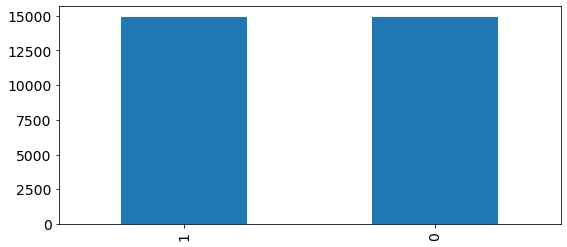

In [25]:
#Visualize our class after balancing
plt.rcParams.update({'figure.figsize': (9.0, 4.0)})
plt.rcParams.update({'font.size': 14})
count = y_resample.value_counts()
print(count)
 
fig, ax = plt.subplots()
y_resample.value_counts().plot(ax=ax, kind='bar')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [27]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.1311 - accuracy: 0.9700
Epoch 2/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0873 - accuracy: 0.9755
Epoch 3/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0734 - accuracy: 0.9788
Epoch 4/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0681 - accuracy: 0.9799
Epoch 5/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0588 - accuracy: 0.9818
Epoch 6/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0535 - accuracy: 0.9830
Epoch 7/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0564 - accuracy: 0.9830
Epoch 8/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 9/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0478 - accuracy: 0.9850
Epoch 10/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.043

Confusion matrix, without normalization


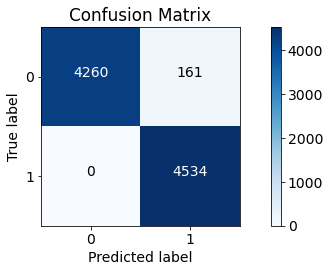

In [28]:
y_pred = model.predict(X_test)
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [29]:
print('accuracy_score',accuracy_score(y_test, y_pred.round()))
print('precision_score',precision_score(y_test, y_pred.round()))
print('recall_score',recall_score(y_test, y_pred.round()))
print('f1_score',f1_score(y_test, y_pred.round()))

accuracy_score 0.9820212171970966
precision_score 0.9657082002129925
recall_score 1.0
f1_score 0.9825549897063603


In [63]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators = 5000)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5000)

In [31]:
y_pred = rf_model.predict(X_test)

In [32]:
rf_model.score(X_test, y_test)

0.997319932998325

In [33]:
cm = confusion_matrix( y_test, y_pred.round())
print(cm)

[[4416    5]
 [  19 4515]]


Confusion matrix, without normalization


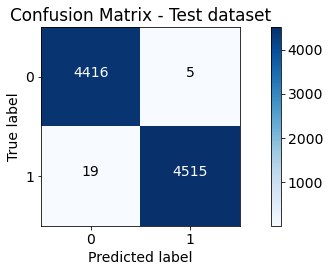

In [34]:
plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')

In [35]:
print('accuracy_score',accuracy_score(y_test, y_pred.round()))
print('precision_score',precision_score(y_test, y_pred.round()))
print('recall_score',recall_score(y_test, y_pred.round()))
print('f1_score',f1_score(y_test, y_pred.round()))

accuracy_score 0.997319932998325
precision_score 0.9988938053097345
recall_score 0.9958094397882664
f1_score 0.9973492379058979


Text(0.5, 0, 'Random Forest Feature Importance')

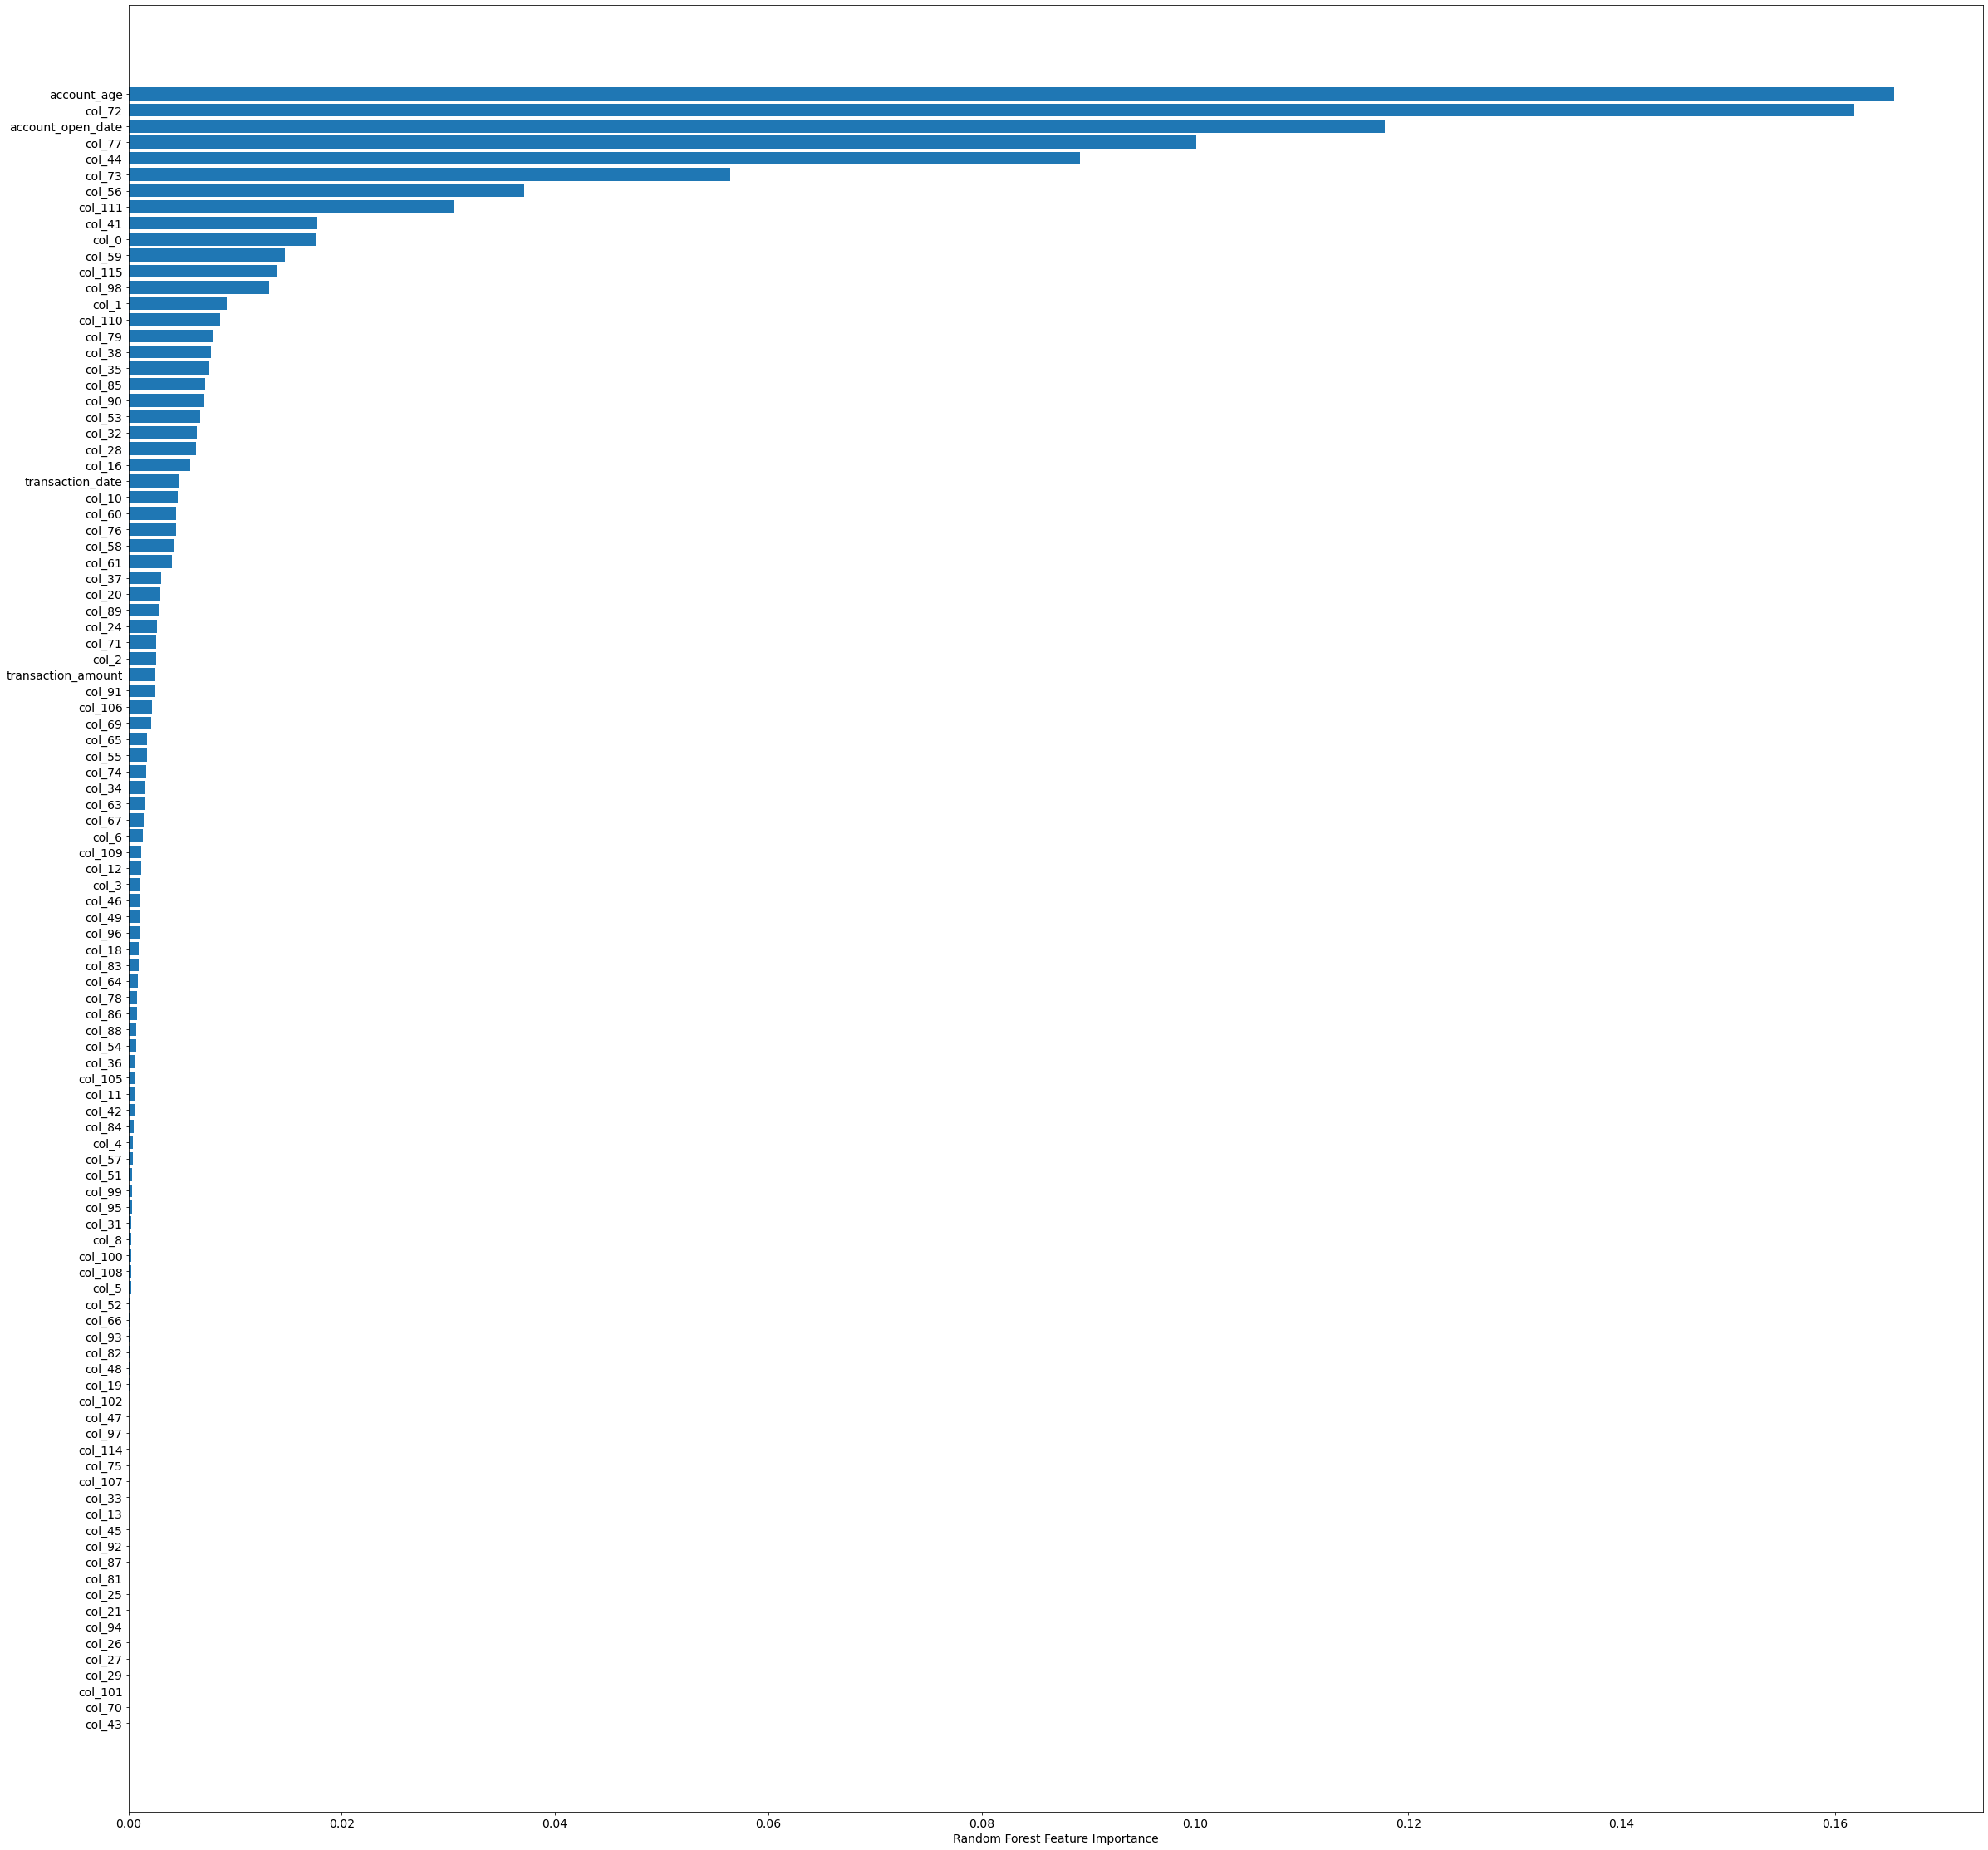

In [36]:
plt.rcParams.update({'figure.figsize': (40.0, 40.0)})
plt.rcParams.update({'font.size': 14})
sorted_idx =rf_model.feature_importances_.argsort()
feat_labels = X.columns[0:]
plt.barh(feat_labels[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Part 4: Improving the predictions


In [37]:
normalized_data_joined.head(2)

,transaction_id,beneficiary,col_7,col_15,col_30,col_40,col_2,transaction_amount,col_0,col_3,col_4,col_8,col_10,col_13,col_16,col_19,col_20,col_21,col_24,col_25,col_26,col_27,col_28,col_29,col_32,col_35,col_36,col_37,col_38,col_41,col_43,col_44,col_45,col_46,col_51,col_52,col_55,col_56,col_59,col_63,col_64,col_65,col_67,col_69,col_72,col_73,col_74,col_76,col_77,col_78,col_79,col_81,col_85,col_87,col_89,col_90,col_91,col_92,col_93,col_94,col_97,col_99,col_100,col_101,col_102,col_105,col_106,col_107,col_109,col_110,col_114,col_115,transaction_date,account_open_date,targets,col_1,col_5,col_6,col_11,col_12,col_18,col_31,col_33,col_34,col_42,col_47,col_48,col_49,col_53,col_54,col_57,col_58,col_60,col_61,col_66,col_70,col_71,col_75,col_82,col_83,col_84,col_86,col_88,col_95,col_96,col_98,col_108,col_111,account_age
0,TRX00000000,Manny's Auto Parts,E,BL1,US,Product_6,0.620112,0.000100,0.0,0.0,0.0,0.0,0.000424,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0011,0.0,0.129534,0.0,0.000726,0.0,0.0,0.0,0.0,0.0,0.000000,0.004926,0.0,0.000000,0.0,0.0,0.0,0.002049,0.001156,0.0,0.0,0.004348,0.0,0.000306,0.0,0.138889,0.0,0.617126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.513145,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.274162
1,TRX00000001,Zach's Agriculture,B,BL0,US,Product_1,0.620112,0.000002,0.0,0.0,0.0,0.0,0.000887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0022,0.0,0.000000,0.0,0.000726,0.0,0.0,0.0,0.0,0.0,0.003886,0.000000,0.0,0.148765,0.0,0.0,0.0,0.002049,0.000000,0.0,0.0,0.000000,0.0,0.000306,0.0,0.000000,0.0,0.435644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.404090,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384615


In [54]:
cat_data = normalized_data_joined.select_dtypes(include=[object])
float_data = normalized_data_joined.select_dtypes(include=[float])
int_data = normalized_data_joined.select_dtypes(include=[int])
cat_data=cat_data.drop(columns=['transaction_id'])
le = LabelEncoder()
cat_data = cat_data.apply(le.fit_transform)
cat_data = cat_data.astype(float)
for col in cat_data.columns:
    cat_data[col] = MinMaxScaler().fit_transform(np.array(cat_data[col]).reshape(-1,1))
imp_data = pd.concat([int_data,cat_data,float_data], axis = 1)

In [55]:
y = imp_data["targets"]
X = imp_data.drop(["targets"], axis = 1)
X_resample, y_resample = SMOTE().fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [58]:
model = Sequential([
Dense(input_dim = 107, units = 60, activation = 'relu'),
Dense(units = 40, activation = 'relu'),
Dropout(0.5),
Dense(units = 28, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dropout(0.5),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.2801 - accuracy: 0.8735
Epoch 2/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.1308 - accuracy: 0.9556
Epoch 3/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.1094 - accuracy: 0.9649
Epoch 4/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0933 - accuracy: 0.9683
Epoch 5/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0824 - accuracy: 0.9721
Epoch 6/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0719 - accuracy: 0.9763
Epoch 7/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0666 - accuracy: 0.9781
Epoch 8/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0607 - accuracy: 0.9804
Epoch 9/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.0559 - accuracy: 0.9816
Epoch 10/50
1393/1393 [==============================] - 4s 3ms/step - loss: 0.050

Confusion matrix, without normalization


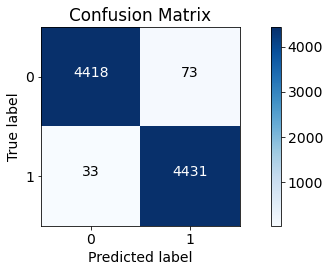

In [59]:
y_pred = model.predict(X_test)
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [64]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

Confusion matrix, without normalization


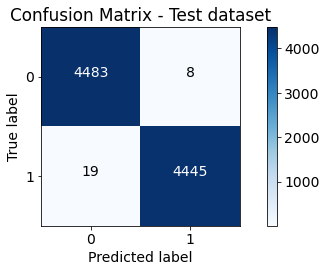

In [67]:
plt.rcParams.update({'figure.figsize': (8.0, 4.0)})
plt.rcParams.update({'font.size': 14})
cm = confusion_matrix( y_test, y_pred.round())
plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')

In [69]:
print('accuracy_score',accuracy_score(y_test, y_pred.round()))
print('precision_score',precision_score(y_test, y_pred.round()))
print('recall_score',recall_score(y_test, y_pred.round()))
print('f1_score',f1_score(y_test, y_pred.round()))

accuracy_score 0.9969849246231156
precision_score 0.9982034583426903
recall_score 0.9957437275985663
f1_score 0.99697207581025


AUC-ROC Curve for Random Forest with Class weights: 0.5005


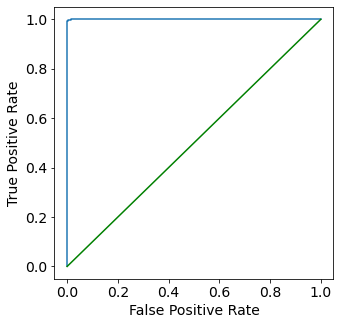

In [99]:

ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")


grid_rfb = GridSearchCV(rf_model, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)
y_proba = grid_rfb.predict_proba(X_test)
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods
plot_auc_roc_curve(y_test, y_proba[:, 1])


Text(0.5, 0, 'Random Forest Feature Importance')

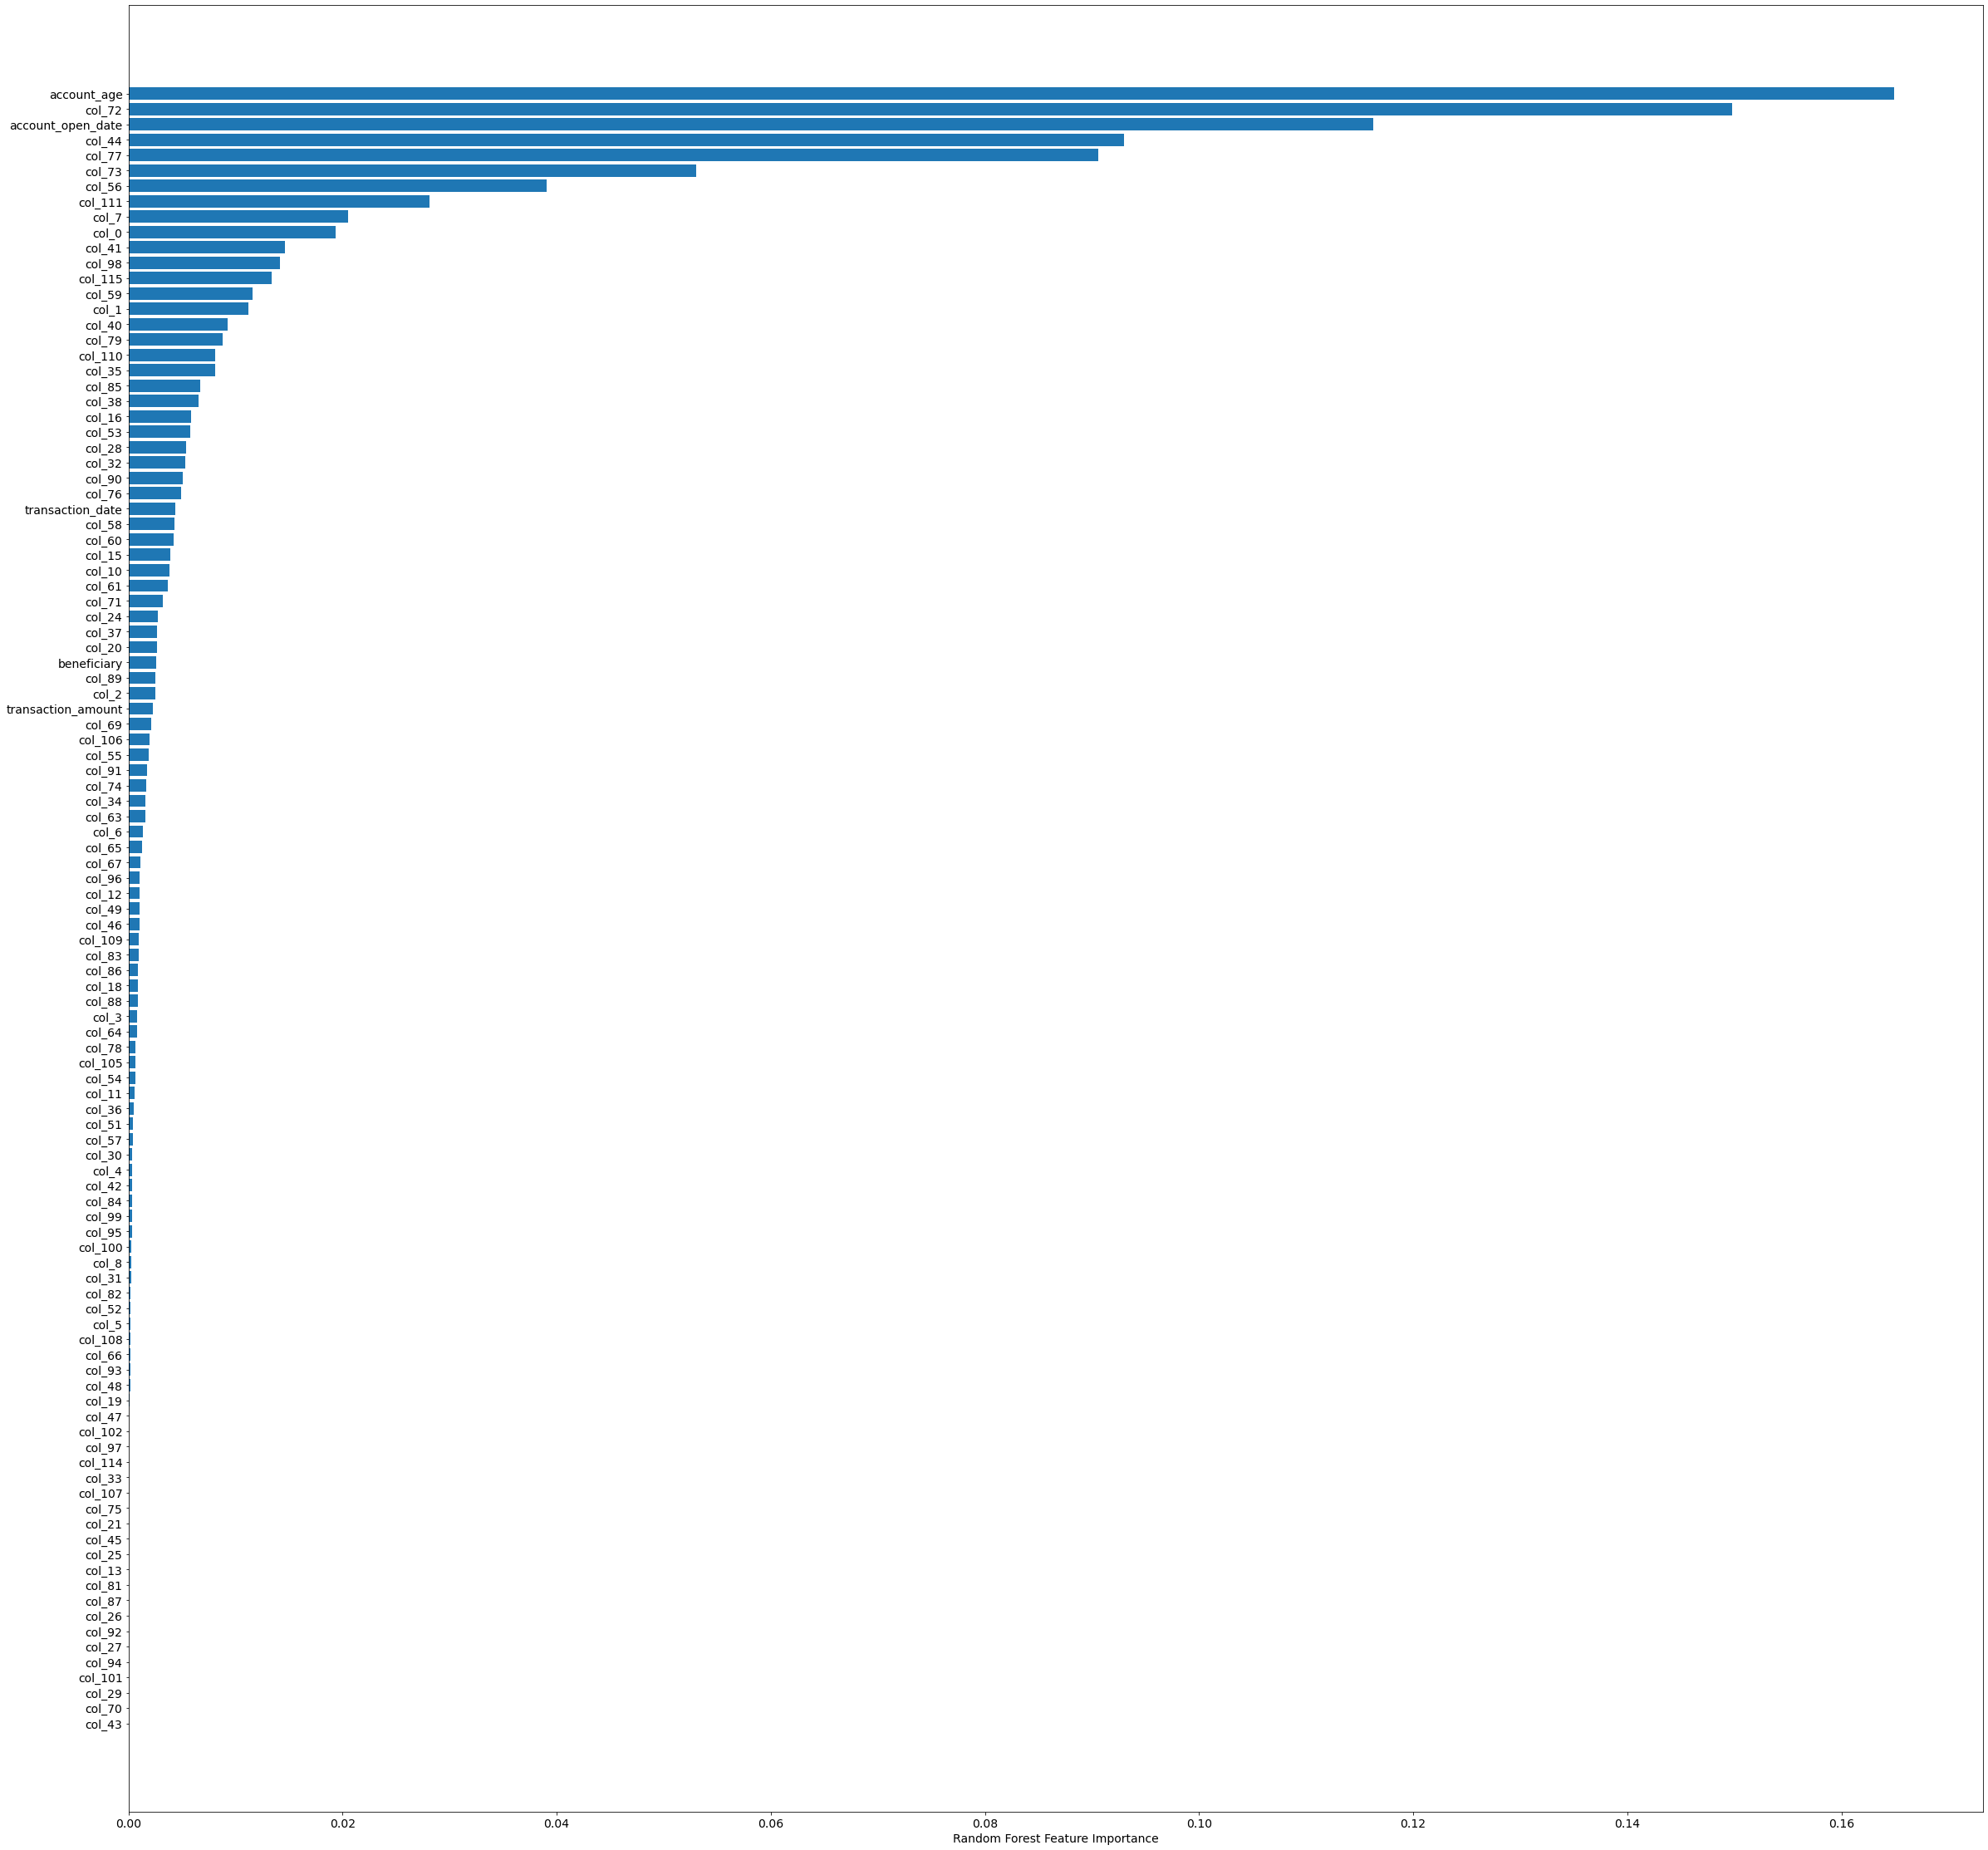

In [66]:
plt.rcParams.update({'figure.figsize': (40.0, 40.0)})
plt.rcParams.update({'font.size': 14})
sorted_idx =rf_model.feature_importances_.argsort()
feat_labels = X.columns[0:]
plt.barh(feat_labels[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Part 5: Discussion

1. You need to perform data analysis on the raw data and present with at least one data visualization.  
What insights can you derive from the raw data? Data is highly unbalanced Mixed types of features, e.g., categorical, boolian, str, numeric (int, float) Missing data,huge outliers,higly skeved data, too many outliers.  New features can be created, e.g., duration since the account was opened, NLP.
Why is the project worthwhile? We can reduce the cost of False positive using ML/DL, save time and money.
What are the potential challenges you may be facing during the model development process? The data is noisy and highly impalance. ML uses pattern to make predections, fraudesters are smart and adapt/ change tactics. Need for adaptive methods that keep learning like Reinforcement Learning 
2. Define proper performance metrics and provide business and statistical rationales of your selections.  
Why are these metrics appropriate? F1 score, AUC-ROC Curve, Precision-Recall Curve, 1-accuracy, AP score. We need to specifically target False Positives because they cost money, and False negative because they lead to financial losses.
3. Derive at least one new features from the data.  
Why can these features potentially help your model? I derived the Account age feature and the Randon Forest model ranked it highly for predicting fraud.
4. Set up an experimental framework and perform hyperparameter optimization.  
Does your design lead to a good approximation to the performance in production in the future? It Does. It has an acceptable FP and FN performance
5. Perform a post-modeling analysis to convince the interviewers about the usability of your model.  
What is the model performance?
accuracy_score 0.9969849246231156
precision_score 0.9982034583426903
recall_score 0.9957437275985663
f1_score 0.99697207581025
What are the key features that drives the predictions? Account age
What threshold do you propose to use for the model and why?

Adding Fairness evaluation 
Fairlearn: This code uses MetricFrame to evaluate fairness by comparing accuracy and demographic parity difference across groups defined by the sensitive attribute. If biases are detected, you could use ExponentiatedGradient for bias mitigation.

SHAP: SHAP is used for global feature importance visualization, explaining how much each feature contributes to the model’s predictions.

LIME: LIME provides local explanations for individual predictions, making it easier to understand why a specific instance was classified as fraud or not fraud.

Visualization: The existing confusion matrix visualization is retained, with additional visualizations from SHAP and LIME for model interpretability.

/tmp/ipykernel_1161842/3066355796.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sample_transaction_data.csv')


Columns with NaN in X_train: ['col_7', 'col_15', 'col_30', 'col_40']
Columns with NaN in X_test: ['col_7', 'col_15', 'col_30', 'col_40']
Fairness metrics:
              accuracy  demographic_parity_difference
beneficiary                                         
-1           0.992715                            0.0


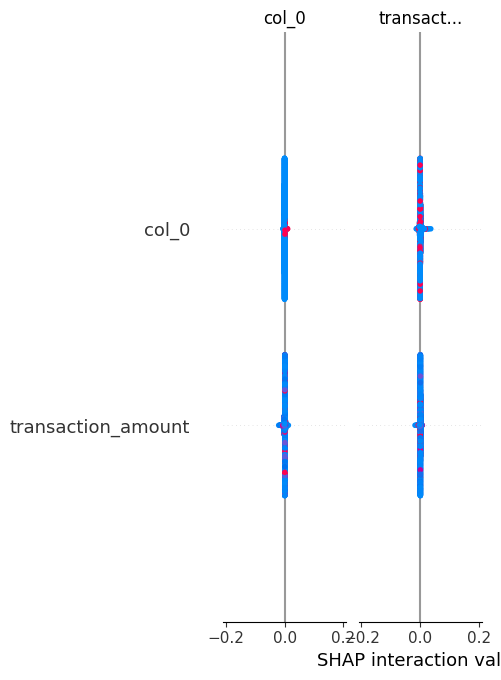

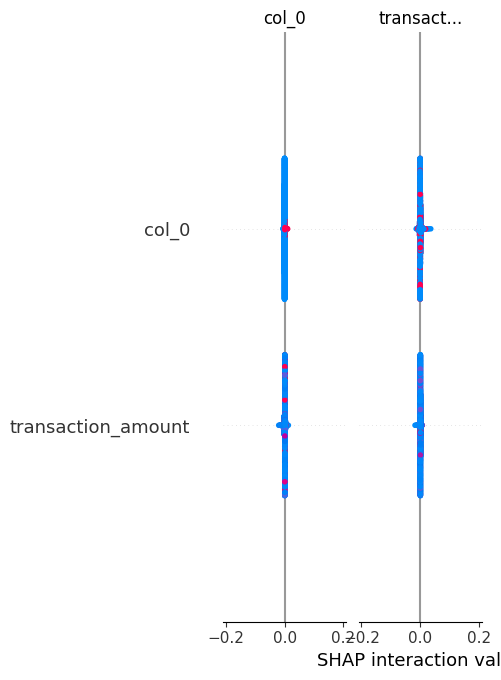

/home/ai/anaconda3/envs/crewai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


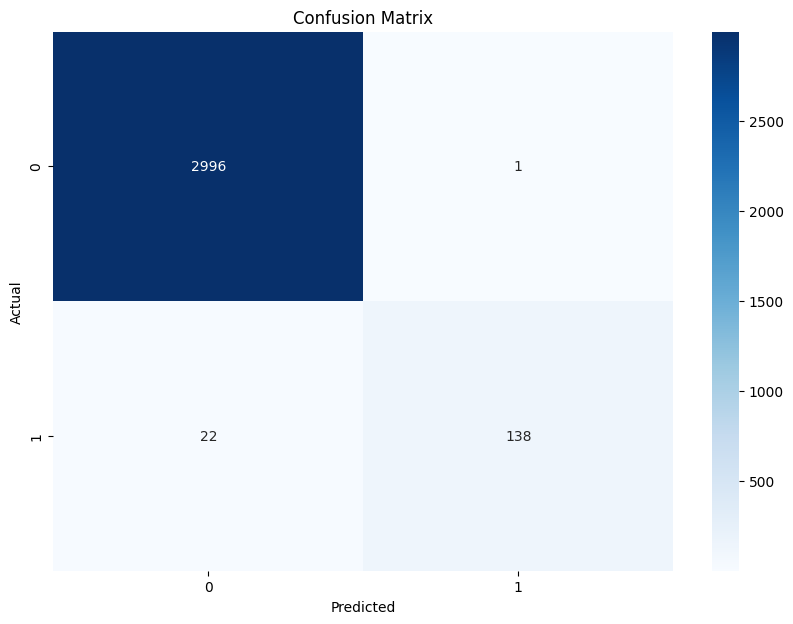

In [23]:
import seaborn as sns
#Load data
data = pd.read_csv('sample_transaction_data.csv')

# Drop irrelevant columns
data = data.drop(['transaction_id', 'transaction_date', 'account_open_date'], axis=1)

# Identify numeric columns and handle non-numeric values
for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is of type object (likely contains strings)
        # Replace non-numeric characters, e.g., remove periods or other unwanted characters
        data[col] = data[col].str.replace('.', '', regex=False)
        # Convert to numeric, forcing errors to NaN
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Fill NaNs in numeric columns with mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle non-numeric columns (e.g., fill with mode or drop if irrelevant)
for col in non_numeric_cols:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fill with mode

# Ensure categorical data is properly encoded
data['beneficiary'] = pd.factorize(data['beneficiary'])[0]

# Define features and target
X = data.drop(['targets', 'beneficiary'], axis=1)
y = data['targets']
sensitive_feature = data['beneficiary']

# Train-test split
X_train, X_test, y_train, y_test, s_train, s_test = train_test_split(X, y, sensitive_feature, test_size=0.2)

# Ensure all NaN values are handled before training and explaining
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Identify columns that still contain NaN values
nan_columns_train = X_train.columns[X_train.isna().any()].tolist()
nan_columns_test = X_test.columns[X_test.isna().any()].tolist()

print(f"Columns with NaN in X_train: {nan_columns_train}")
print(f"Columns with NaN in X_test: {nan_columns_test}")

# Drop or further process these columns if needed
X_train = X_train.drop(columns=nan_columns_train)
X_test = X_test.drop(columns=nan_columns_test)

# Ensure no NaNs remain
assert not X_train.isnull().values.any(), "There are still NaN values in X_train"
assert not X_test.isnull().values.any(), "There are still NaN values in X_test"

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Custom wrapper for demographic_parity_difference
def demographic_parity_wrapper(y_true, y_pred, sensitive_features):
    return demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_features)

# Fairlearn: Evaluate fairness
metric_frame = MetricFrame(
    metrics={
        "accuracy": accuracy_score,
        "demographic_parity_difference": lambda y_true, y_pred: demographic_parity_wrapper(y_true, y_pred, s_test)
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=s_test
)
print("Fairness metrics:\n", metric_frame.by_group)

# SHAP: Explain model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# LIME: Explain individual predictions
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Not Fraud', 'Fraud'], discretize_continuous=True)
i = 10  # Example index of the test instance to explain
exp = explainer.explain_instance(X_test.values[i], model.predict_proba)
exp.show_in_notebook(show_table=True)

# Visualization: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()